# The Analyzer

In [8]:
# Libraries
import folium
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as sql
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
# Connect to Wine Database
db_connection = sql.connect(host='lx26.hoststar.hosting',
                            database="ch309974_DA_winery", user='ch309974_DA_winery_user', password='ch309974_DA_winery_user1!')

# We assume that all values that are 0 or null don't have Ratings. That's why we exclude it.
query = 'SELECT * FROM wine where bewertung > 0'
df_response = pd.read_sql(sql=query, con=db_connection)

# Remove some 'extreme' values
df = df_response.loc[(df_response['preis_chf'] >= 5) &
            (df_response['preis_chf'] <= 500)]

# Reset index
df = df.reset_index(drop=True)

,typ,wein_name,land,region,produzent,rebsorte,bewertung,alkohol,inhalt_cl,anzahl_fl,jahrgang,prime_start,prime_end,preis_chf,preis_cl,lat,lon
0,rot,Apothic Inferno Red Blend Wine with a Whiskey ...,USA,NaN,E. & J. Gallo Winery,NaN,4.0,16.0,75.0,1,2018,2022,2023,19.95,0.27,39.783730,-100.445882
1,rot,Apothic Dark California Red Blend,USA,NaN,NaN,diverse Sorten,5.0,14.0,75.0,1,2016,2022,2024,12.95,0.17,39.783730,-100.445882
2,rot,Antonini Monte Chiara Montepulciano d'Abruzzo DOC,Italien,Abruzzen,Montepulciano,NaN,4.0,12.5,75.0,1,2020,2023,2024,3.75,0.05,42.638426,12.674297
3,rot,Angelin Langhe Nebbiolo DOC,Italien,Piemont,Angelo Negro,Nebbiolo,0.0,14.0,75.0,1,2021,2022,2026,17.50,0.23,42.638426,12.674297
4,rot,Amarone della Valpolicella DOCG Vigne Alte Zeni,Italien,Venetien,Cantina Zeni,Molinara,5.0,15.5,75.0,1,2019,2024,2028,32.95,0.44,42.638426,12.674297


## Compare wine type to price

In [27]:
# Read the data to a pandas data frame
df_price = df[['typ', 'preis_cl']]

# Show categories of 'Make'
print(df_price['typ'].value_counts())

# Drop extreme values
df_price = df_price.drop(df_price[df_price.preis_cl > 2].index)
df_price.head()

rot           1611
weiss          595
rose           160
schaumwein     157
champagner      95
dessert         43
Name: typ, dtype: int64


,typ,preis_cl
0,rot,0.27
1,rot,0.17
2,rot,0.05
3,rot,0.23
4,rot,0.44


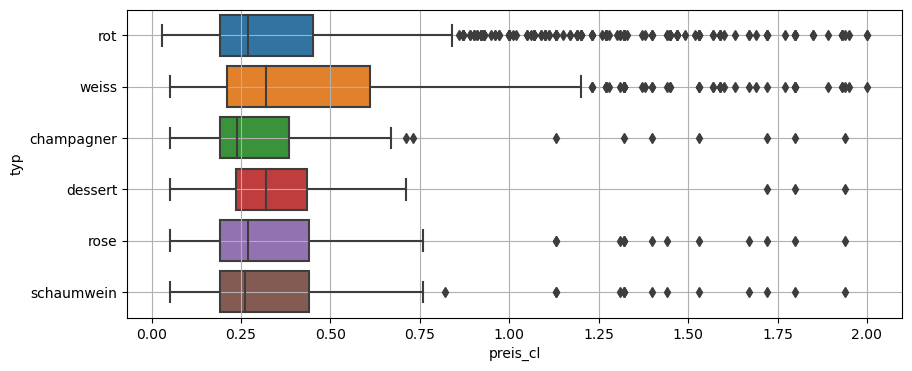

In [33]:
# Plot boxplot with groups
plt.figure(figsize=(10,4))
ax = sns.boxplot(x="preis_cl",
                 y="typ",
                 data=df_price,
                 orient='h')
plt.grid()
plt.show()

## Adding geolocations for all production countries / regions

### Preparing data from csv to plot to map

In [35]:
# Read the data to a pandas data frame
df1 = df[['land', 'lat', 'lon']]

# Preparing data, so it doesn't plot duplicate values more than once
df2 = df1.drop_duplicates()
df3 = df2.reset_index(drop=True)
df3.head()

,land,lat,lon
0,USA,39.783730,-100.445882
1,Italien,42.638426,12.674297
2,Argentinien,-34.996496,-64.967282
3,Frankreich,46.603354,1.888334
4,Chile,-31.761336,-71.318770


### Plotting the map

In [36]:
# Initalises the map
m = folium.Map(location=[47.44, 8.65], zoom_start=10)

# Add lat/lon of addresses
for i in range(0, len(df3)):
    folium.Marker(location=(df3.iloc[i]['lat'], 
                            df3.iloc[i]['lon']), 
                  popup=df3.iloc[i]['land']).add_to(m)

# Layer control
folium.LayerControl().add_to(m)

# Plot map
m